# Introducción 
En este laboratorio volveremos a ocupar el dataset de datos climáticos para poder hacer predicciones de lluvia. 

# Actividades

En este ejercicio se ha realizado un análsis exploratorio y se ejecutarán cuatro modelos distintos de Machine Learning.

Tu objetivo es evaluar cual es el mejor modelo y justificarlo con el usuario.


¡Empezamos! 
## Importar las librerías 
Antes de empezar vamos a importar las siguientes librerías: 

- Pandas 
- Numpy 
- Matplotlib
- Seaborn

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# sklearn
from sklearn.model_selection import train_test_split,RepeatedKFold
# model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor 


Populating the interactive namespace from numpy and matplotlib


## Cargar un archivo de datos


En este caso subiremos subir un primer archivo en forma local, weather.csv (el profesor te facilitirá los archivos) ejecutando lo siguiente:


In [6]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=",")
df

Saving weather.csv to weather (2).csv


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,50,38,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,19,45,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,9,63,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,28,69,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


## Análisis exploratorio

In [7]:
# conocer los primeros datos
print(df.head())
# información
print(df.info())
# descripción
print(df.describe())
# cantidad de filas/columnas
print(df.shape)
# Columnas
print(df.columns)
df.drop(['WindDir9am', 'WindDir3pm',
         'WindSpeed9am', 'WindSpeed3pm',
         'Humidity9am', 'Humidity3pm',
         'Pressure9am', 'Pressure3pm',
         'Cloud9am', 'Cloud3pm',
         'Temp9am','Temp3pm'],axis=1,inplace=True)

   MinTemp  MaxTemp  Rainfall  ...  RainToday  RISK_MM RainTomorrow
0      8.0     24.3       0.0  ...         No      3.6          Yes
1     14.0     26.9       3.6  ...        Yes      3.6          Yes
2     13.7     23.4       3.6  ...        Yes     39.8          Yes
3     13.3     15.5      39.8  ...        Yes      2.8          Yes
4      7.6     16.1       2.8  ...        Yes      0.0           No

[5 rows x 22 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 

## Analizar

¿Qué está mostrando el siguiente gráfico?

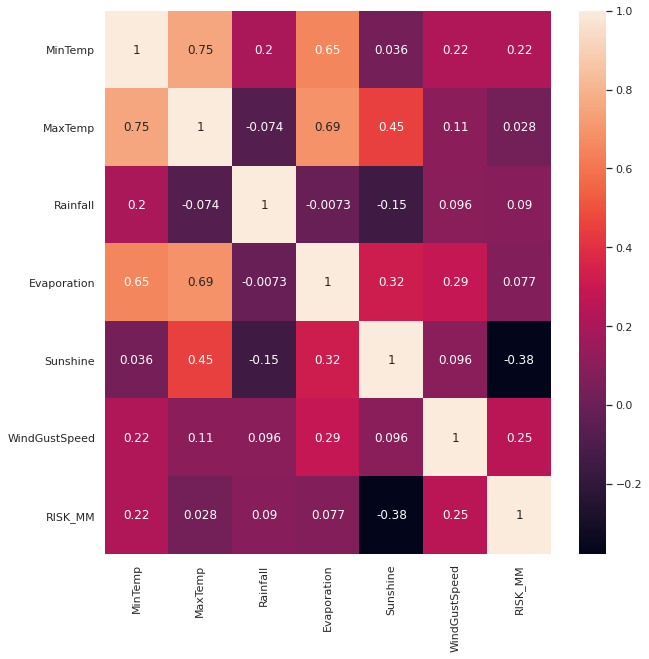

In [10]:
sns.set(
    rc={
        "figure.figsize":(10,10)
    }
)
sns.heatmap(
    df.corr(),
    annot=True
)

## Analizar

¿Por qué se están mostrando sólo estas características?

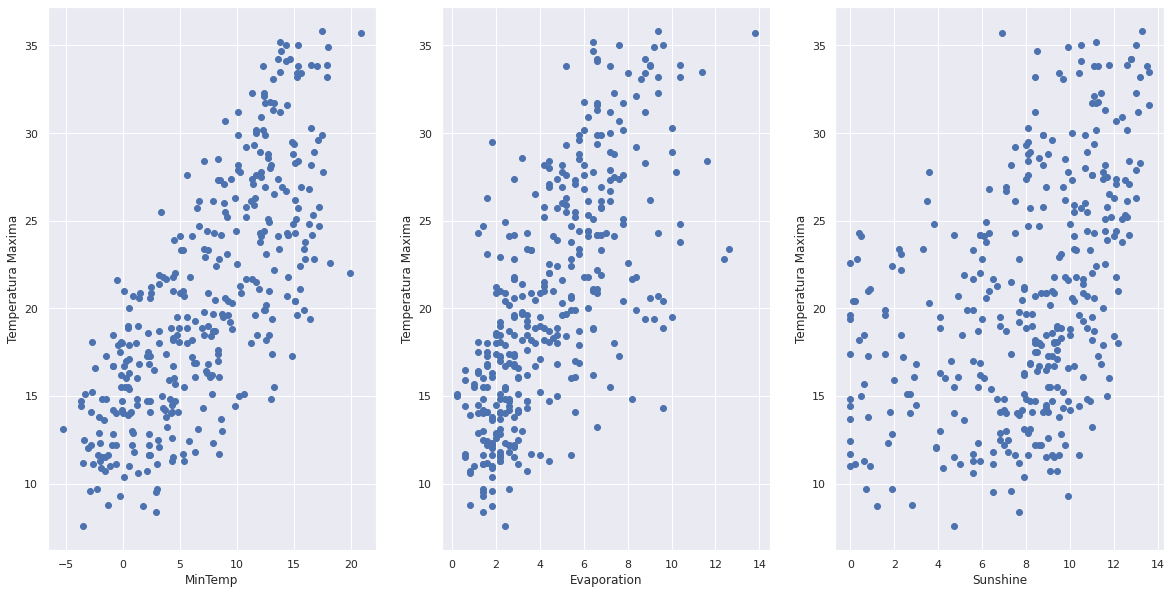

In [11]:
caracteristicas = ["MinTemp","Evaporation","Sunshine"]
for col in caracteristicas:
  df[col].fillna(df[col].mean(),inplace=True)
maxTemp = df["MaxTemp"]
plt.figure(
    figsize=(20,10)
)
for pivote,col in enumerate(caracteristicas):
  plt.subplot(
      1,
      len(caracteristicas),
      pivote+1
  )
  plt.scatter(
      df[col],
      maxTemp
  )
  plt.xlabel(col)
  plt.ylabel("Temperatura Maxima")
plt.show()

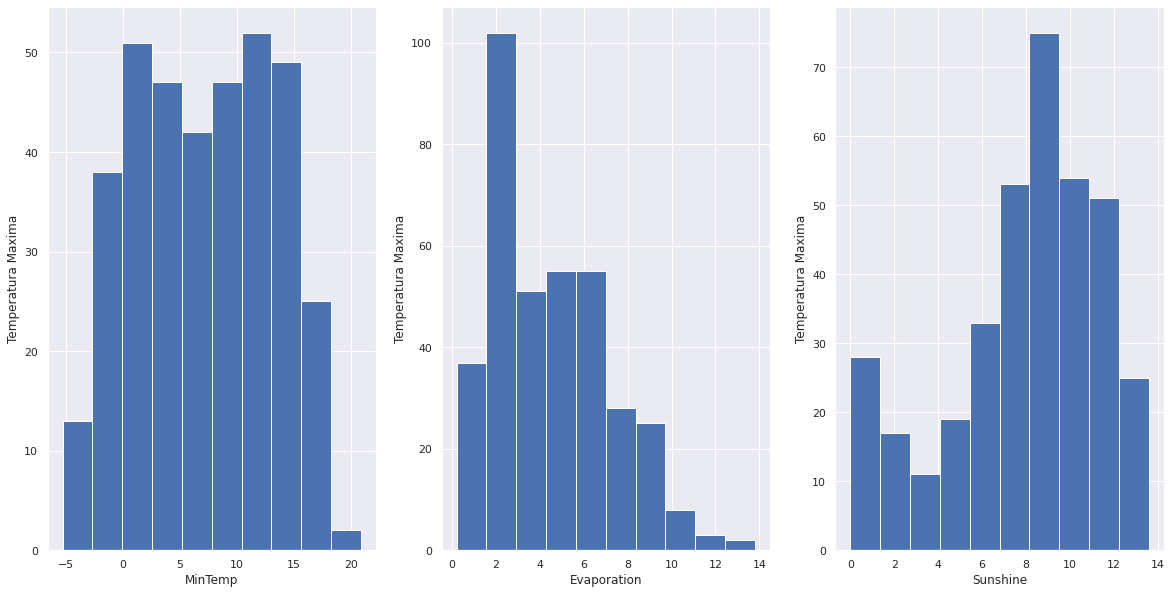

In [12]:
plt.figure(
    figsize=(20,10)
)
for pivote,col in enumerate(caracteristicas):
  plt.subplot(
      1,
      len(caracteristicas),
      pivote+1
  )
  plt.hist(
      df[col],
      bins=10
  )
  plt.xlabel(col)
  plt.ylabel("Temperatura Maxima")
plt.show()

## Generando distintos modelos



In [13]:
# Separando la información para entrenamiento
datos_entre = df[caracteristicas]
eti_temp = maxTemp
datos_entrenamiento,datos_prueba,eti_entrenamiento,eti_prueba = train_test_split(
    datos_entre,
    eti_temp,
    test_size=0.25,
    random_state=1
)
print("Los datos para entrenamiento son : ",datos_entrenamiento.shape)
print("Los datos para prueba son : ",datos_prueba.shape)
print("Los eti para entrenamiento son : ",eti_entrenamiento.shape)
print("Los eti para prueba son : ",eti_prueba.shape)

Los datos para entrenamiento son :  (274, 3)
Los datos para prueba son :  (92, 3)
Los eti para entrenamiento son :  (274,)
Los eti para prueba son :  (92,)


In [15]:
# Entrenamieto de los modelos
# DecisionTreeRegressor
# LinearRegression
# KNeighborsRegressor
# RandomForestRegressor 
modelos = []
modelos.append(("DecisionTreeRegressor",DecisionTreeRegressor()))
modelos.append(("LinearRegression",LinearRegression()))
modelos.append(("KNeighborsRegressor",KNeighborsRegressor()))
modelos.append(("RandomForestRegressor",RandomForestRegressor())) 
for nombre,modelo in modelos:
  modelo.fit(datos_entrenamiento,eti_entrenamiento)
  resultado = modelo.score(datos_prueba,eti_prueba)
  print("El modelo {mol} tiene un rendimiento del {ren:.2f}%".format(
      mol=nombre,
      ren=resultado*100
  ))

El modelo DecisionTreeRegressor tiene un rendimiento del 61.34%
El modelo LinearRegression tiene un rendimiento del 78.93%
El modelo KNeighborsRegressor tiene un rendimiento del 75.52%
El modelo RandomForestRegressor tiene un rendimiento del 74.96%


## Analizar y Justificar

A continuación, genera el análisis de métricas de los modelos utilizados, de preferencia utiliza gráficos comparativos.

Elige el mejor modelo, justifica tu elección ante el curso.